In [49]:

path= "data/"

In [50]:
#basic libraries
from __future__ import division, print_function
import os, json
from glob import glob
import numpy as np
import random
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [51]:
import utils

from utils import plots

In [52]:
batch_size=64

In [54]:
import keras

(375, 499, 3)


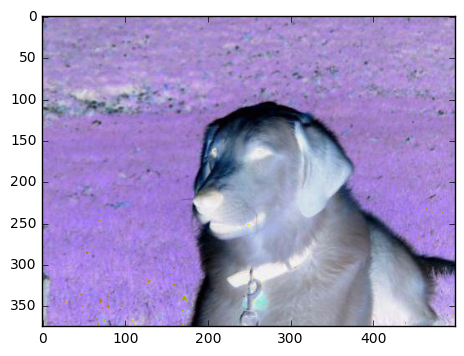

In [55]:
from PIL import Image
%matplotlib inline
path = os.path.join(os.getcwd(),"data/train/dog/*.jpg")
filename = random.choice(glob(path))

img = Image.open(filename)
img.load()
data = np.asarray(img, dtype="int32")
print(data.shape)
plt.imshow(data)

In [216]:
import os
path = os.path.join(os.getcwd(), "data/valid/")
files = glob(path+"*.jpg")
for f in files:
    data_dir,filename = os.path.split(f)
    category = filename.split(".")[0]
    category_directory = os.path.join(data_dir,category)
    if not os.path.exists(category_directory):
        os.makedirs(category_directory)
    else:
        #print(os.path.join(category_directory,filename))
        os.rename(f,os.path.join(category_directory,filename))

In [218]:
targetSize = (224,244)
path = os.path.join(os.getcwd(), "data/train/")
train_gen = keras.preprocessing.image.ImageDataGenerator()
train_generator = train_gen.flow_from_directory(path, target_size=targetSize,           
                        class_mode='sparse',shuffle=True,batch_size=32)

val_path = os.path.join(os.getcwd(), "data/valid/")
valid_gen = keras.preprocessing.image.ImageDataGenerator()
valid_gen.flow_from_directory(val_path, target_size=targetSize,
                              class_mode='sparse',shuffle=True,batch_size=32)

Found 23750 images belonging to 2 classes.


Found 1250 images belonging to 2 classes.


In [200]:
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Input, InputLayer, Dropout, Dense, Flatten

from keras.optimizers import SGD, RMSprop, Adam

In [224]:
#I just cant get this to work.

model = keras.models.Sequential()
model.add(Convolution2D(1,3,3, input_shape=(224,224,3),activation='relu'))

In [225]:
def ConvBlock(layers, model, filters):
    for i in range(layers):
        model.add(ZeroPadding2D(padding=(1,1)))
        model.add(Convolution2D(filters,3,3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

In [226]:
def FCBlock(model):
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(.5))

In [227]:
ConvBlock(1,model, 64)
ConvBlock(1,model,128)
ConvBlock(1, model,128)
ConvBlock(1, model, 256)
ConvBlock(1, model, 512)

model.add(Flatten())
FCBlock(model)
FCBlock(model)
model.add(Dense(3,activation='softmax'))
model.compile(optimizer=Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [228]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_123 (Convolution2D (None, 222, 222, 1)   28          convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
zeropadding2d_140 (ZeroPadding2D (None, 224, 224, 1)   0           convolution2d_123[0][0]          
____________________________________________________________________________________________________
convolution2d_124 (Convolution2D (None, 222, 222, 64)  640         zeropadding2d_140[0][0]          
____________________________________________________________________________________________________
maxpooling2d_66 (MaxPooling2D)   (None, 111, 111, 64)  0           convolution2d_124[0][0]          
___________________________________________________________________________________________

In [221]:
from keras import callbacks

model_path = os.getcwd() + "/weights/best_autopilot.hdf5"
model_dir = os.path.split(model_path)[0]
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
save_best = callbacks.ModelCheckpoint(model_path,monitor="val_loss",
                                      verbose=1.,
                                      save_best_only=True,
                                      mode='min')

early_stop = callbacks.EarlyStopping(monitor='val_loss',
                                     min_delta=0,
                                     patience=5,
                                     verbose=0,
                                     mode='auto')
callbacks_list = [save_best, early_stop]

In [222]:
batches.nb_sample
model.fit_generator(train_generator, 
                    batches.nb_sample,
                    1,
                    verbose=1)

Epoch 1/1


ValueError: Error when checking model input: expected convolution2d_input_1 to have shape (None, 224, 224, 3) but got array with shape (32, 224, 244, 3)